In [1]:
from astropy.table import Table, join, vstack
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy import constants as c
from astropy import units as u
import numpy as np

plt.style.use('paper')

In [2]:
galaxies = ['ic5332',
            'ngc0628',
            'ngc5068',
            'ngc4535',
            'ngc4321',
            'ngc4303',
            'ngc4254',
            'ngc3627',
            'ngc3351',
            'ngc2835',
            'ngc1672',
            'ngc1566',
            'ngc1512',
            'ngc1433',
            'ngc1385',
            'ngc1365',
            'ngc1300',
            'ngc1087',
            'ngc7496']

In [3]:
t_f657n = Table.read('./data/HST_WFC3_UVIS1.F657N.dat', format='ascii')
t_f658n = Table.read('./data/HST_WFC3_UVIS1.F658N.dat', format='ascii')
t_sample = Table.read('./data/phangs_sample_table_v1p6.fits')
t_sample = vstack([t_sample[t_sample['name'] == name] for name in galaxies])
t_sample.sort('name')

In [4]:
t_sample['orient_vlsr_Ha_reshift'] = (((t_sample['orient_vlsr'].quantity/c.c.to('km/s')) * 6564.614) + 6564.614) * u.AA
t_sample.sort('orient_vlsr_Ha_reshift')
t_sample['name', 'orient_vlsr','orient_vlsr_Ha_reshift']

name,orient_vlsr,orient_vlsr_Ha_reshift
,km / s,Angstrom
bytes100,float32,float32
ngc0628,650.75085,6578.8633
ngc5068,667.21063,6579.2236
ic5332,699.2961,6579.9263
ngc3627,715.35803,6580.2783
ngc3351,774.73694,6581.578
ngc2835,867.2845,6583.605
ngc1512,871.42554,6583.6953
ngc1433,1057.3772,6587.7676


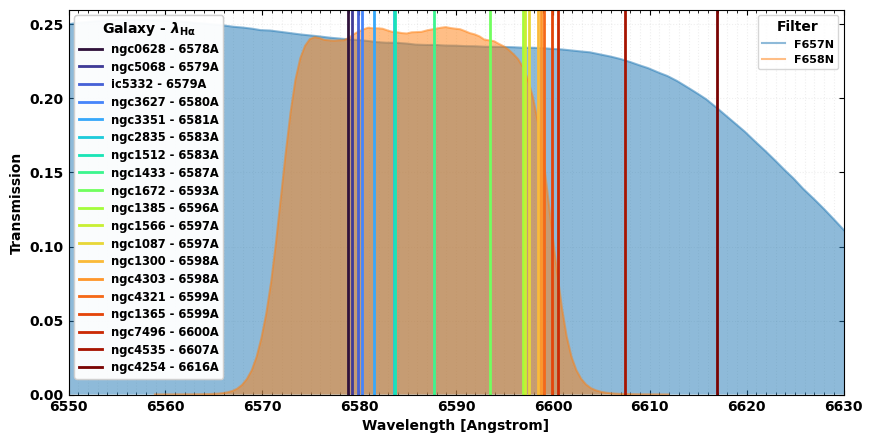

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.plot(t_f657n['col1'], t_f657n['col2'], zorder=1, alpha=0.5)
ax.fill_between(t_f657n['col1'], t_f657n['col2'], alpha=0.5, zorder=1)

ax.plot(t_f658n['col1'], t_f658n['col2'], zorder=2, alpha=0.5)
ax.fill_between(t_f658n['col1'], t_f658n['col2'], alpha=0.5, zorder=2)

colors = plt.cm.turbo(np.linspace(0, 1, len(t_sample['orient_vlsr_Ha_reshift'])))
for w, n, color in zip(t_sample['orient_vlsr_Ha_reshift'].quantity.value, t_sample['name'], colors): 
    ax.plot([w, w], [0, 1], alpha=1, label='%s - %iA' %(n,w), c=color, lw=2)

# ax.set_xlim([6454, 6710])
ax.set_xlim([6550, 6630])
ax.set_ylim([0, 0.26])

ax.set_xlabel('Wavelength [Angstrom]')
ax.set_ylabel('Transmission')

lines = ax.get_lines()
legend1 = ax.legend([lines[i] for i in [0,1]], ["F657N", "F658N"], fontsize=8, loc='upper right', title='Filter')
ax.add_artist(legend1)

lines = ax.get_lines()[2:]
legend2 = ax.legend([lines[i] for i in range(len(lines))], [lines[i].get_label() for i in range(len(lines))], loc='upper left', fontsize=8.2, title=r'Galaxy - $\lambda_\mathrm{H\alpha}$')
ax.add_artist(legend2)

ax.grid(':', alpha=0.2, which='both')

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))

fig.savefig('./filters.png', dpi=300, bbox_inches='tight', transparent=False)